In [35]:
import pandas as pd
import polars as pl

df = pd.read_csv('/home/toefl/K/MCTS/dataset/train.csv')

In [36]:
from tqdm import tqdm

df = df.drop(['Id','num_wins_agent1','num_draws_agent1', 'num_losses_agent1', 'GameRulesetName', 'EnglishRules', "LudRules"], axis=1)

mappings = {}
for feature in tqdm(df.columns):
    if feature == "utility_agent1": continue
    m = {}

    for u in df[feature].unique():
        slc = df[df[feature] == u]
        if len(slc) < 100: continue

        if (slc["utility_agent1"] == 1).all():
            m[feature] = 3
        elif (slc["utility_agent1"] == 0).all():
            m[feature] = 2
        elif (slc["utility_agent1"] == -1).all():
            m[feature] = 1
        else:
            m[feature] = 0
    
    mappings[feature] = m

100%|██████████| 807/807 [03:57<00:00,  3.39it/s]


In [19]:
from tqdm import tqdm

df = df.drop(['Id','num_wins_agent1','num_draws_agent1', 'num_losses_agent1', 'GameRulesetName', 'EnglishRules', "LudRules"], axis=1)

columns = []
for feature in tqdm(df.columns):
    for u in df[feature].unique():
        slc = df[df[feature] == u]
        if slc["utility_agent1"].mean() < -0.99:
            columns.append((feature, u, len(slc), "target=-1"))
        elif slc["utility_agent1"].mean() > 0.99:
            columns.append((feature, u, len(slc), "target=1"))
        elif (slc["utility_agent1"] == 0).all():
            columns.append((feature, u, len(slc), "target=0"))

print(columns)

100%|██████████| 807/807 [04:33<00:00,  2.95it/s]

[('NumPlayableSitesOnBoard', 545, 172, 'target=0'), ('NumPlayableSitesOnBoard', 133, 166, 'target=0'), ('NumPlayableSitesOnBoard', 306, 350, 'target=0'), ('NumCorners', 21, 358, 'target=1'), ('NumCorners', 35, 184, 'target=1'), ('NumCorners', 28, 190, 'target=1'), ('NumDirections', 0.8, 184, 'target=1'), ('NumDirections', 4.73, 346, 'target=1'), ('NumDirections', 3.3, 182, 'target=1'), ('NumDirections', 12.25, 182, 'target=0'), ('NumDirections', 12.0, 190, 'target=1'), ('NumOrthogonalDirections', 0.8, 184, 'target=1'), ('NumOrthogonalDirections', 12.25, 182, 'target=0'), ('NumOrthogonalDirections', 12.0, 190, 'target=1'), ('NumDiagonalDirections', 1.9, 184, 'target=0'), ('NumDiagonalDirections', 3.12, 206, 'target=1'), ('NumDiagonalDirections', 3.15, 180, 'target=1'), ('NumDiagonalDirections', 1.45, 346, 'target=1'), ('NumAdjacentDirections', 0.8, 184, 'target=1'), ('NumAdjacentDirections', 12.25, 182, 'target=0'), ('NumAdjacentDirections', 12.0, 190, 'target=1'), ('NumInnerSites', 240

In [20]:
columns = sorted(columns, key=lambda x: x[2], reverse=True)

In [26]:
len(columns)

2007

In [16]:
df["DurationActions"].value_counts()

2500.00     724
487.02      392
12.00       374
27.64       374
923.46      372
           ... 
41032.38     72
1609.31      72
620.98       72
2279.93      70
359.20        4
Name: DurationActions, Length: 1361, dtype: int64

In [22]:
len(['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214', 'autoFE_f_228', 'autoFE_f_361', 'autoFE_f_460', 'autoFE_f_354', 'autoFE_f_257', 'autoFE_f_78', 'autoFE_f_482', 'autoFE_f_466', 'autoFE_f_287', 'autoFE_f_67', 'autoFE_f_462', 'autoFE_f_481', 'autoFE_f_419', 'autoFE_f_0', 'autoFE_f_7', 'autoFE_f_392', 'autoFE_f_62', 'autoFE_f_135', 'autoFE_f_5', 'autoFE_f_184', 'autoFE_f_246', 'autoFE_f_474', 'autoFE_f_157', 'autoFE_f_304', 'autoFE_f_377', 'autoFE_f_384', 'autoFE_f_187', 'autoFE_f_340', 'autoFE_f_51', 'autoFE_f_281', 'autoFE_f_109', 'autoFE_f_50', 'autoFE_f_141', 'autoFE_f_183', 'autoFE_f_478', 'autoFE_f_54', 'autoFE_f_119', 'autoFE_f_159', 'autoFE_f_265', 'autoFE_f_258', 'autoFE_f_313', 'autoFE_f_101', 'autoFE_f_262', 'autoFE_f_366', 'autoFE_f_330', 'autoFE_f_15', 'autoFE_f_126', 'autoFE_f_404', 'autoFE_f_169', 'autoFE_f_270'])

100

In [21]:
columns

[('utility_agent1', 1.0, 29604, 'target=1'),
 ('utility_agent1', -1.0, 23846, 'target=-1'),
 ('utility_agent1', 0.0, 19711, 'target=0'),
 ('DurationActions', 2500.0, 724, 'target=0'),
 ('DurationMoves', 10000.0, 528, 'target=0'),
 ('BranchingFactorAverage', 5.08, 392, 'target=1'),
 ('PieceNumberMaximum', 3.99, 390, 'target=1'),
 ('DecisionFactorMedian', 6.13, 384, 'target=-1'),
 ('BranchingFactorChangeMaxDecrease', -7.22, 372, 'target=1'),
 ('DecisionFactorVariance', 5.67, 370, 'target=1'),
 ('DecisionFactorMaxIncrease', 8.17, 370, 'target=-1'),
 ('PieceNumberAverage', 3.75, 370, 'target=-1'),
 ('FromToDecisionWithinBoardFrequency', 0.04, 366, 'target=0'),
 ('BranchingFactorChangeMaxDecrease', -9.15, 364, 'target=1'),
 ('DecisionFactorMedian', 5.12, 364, 'target=1'),
 ('SlideDecisionFrequency', 0.89, 362, 'target=0'),
 ('CustodialCaptureFrequency', 0.08, 362, 'target=0'),
 ('DecisionFactorAverage', 3.74, 362, 'target=1'),
 ('PieceNumberAverage', 3.96, 362, 'target=1'),
 ('DecisionFacto

In [3]:
df["Asymmetric"].value_counts()

0    189742
1     43492
Name: Asymmetric, dtype: int64

In [ ]:
pl.Config = pl.Config(tbl_cols=-1)

In [ ]:
df["NumDice"].value_counts()

NumDice,count
i64,u32
4,5110
7,270
1,4062
5,84
6,780
0,217358
2,3608
3,1962


In [ ]:
df.head(10)

Id,GameRulesetName,agent1,agent2,Properties,Format,Time,Discrete,Realtime,Turns,Alternating,Simultaneous,Stochastic,HiddenInformation,Match,Asymmetric,AsymmetricRules,AsymmetricPlayRules,AsymmetricEndRules,AsymmetricForces,AsymmetricSetup,AsymmetricPiecesType,Players,NumPlayers,Simulation,Solitaire,TwoPlayer,Multiplayer,PlayersWithDirections,Cooperation,Team,Coalition,Puzzle,DeductionPuzzle,PlanningPuzzle,Equipment,Container,Board,Shape,SquareShape,HexShape,TriangleShape,DiamondShape,RectangleShape,SpiralShape,CircleShape,PrismShape,StarShape,ParallelogramShape,SquarePyramidalShape,RectanglePyramidalShape,RegularShape,PolygonShape,TargetShape,Tiling,SquareTiling,HexTiling,TriangleTiling,BrickTiling,SemiRegularTiling,CelticTiling,MorrisTiling,QuadHexTiling,CircleTiling,ConcentricTiling,SpiralTiling,AlquerqueTiling,MancalaBoard,MancalaStores,MancalaTwoRows,MancalaThreeRows,MancalaFourRows,MancalaSixRows,MancalaCircular,AlquerqueBoard,AlquerqueBoardWithOneTriangle,AlquerqueBoardWithTwoTriangles,AlquerqueBoardWithFourTriangles,AlquerqueBoardWithEightTriangles,ThreeMensMorrisBoard,ThreeMensMorrisBoardWithTwoTriangles,NineMensMorrisBoard,StarBoard,CrossBoard,KintsBoard,PachisiBoard,FortyStonesWithFourGapsBoard,Track,TrackLoop,TrackOwned,Hints,Region,Boardless,PlayableSites,Vertex,Cell,Edge,NumPlayableSitesOnBoard,NumColumns,NumRows,NumCorners,NumDirections,NumOrthogonalDirections,NumDiagonalDirections,NumAdjacentDirections,NumOffDiagonalDirections,NumOuterSites,NumInnerSites,NumLayers,NumEdges,NumCells,NumVertices,NumPerimeterSites,NumTopSites,NumBottomSites,NumRightSites,NumLeftSites,NumCentreSites,NumConvexCorners,NumConcaveCorners,NumPhasesBoard,Hand,NumContainers,NumPlayableSites,Component,Piece,PieceValue,PieceRotation,PieceDirection,Dice,DiceD2,DiceD3,DiceD4,DiceD6,BiasedDice,Card,Domino,LargePiece,Tile,NumComponentsType,NumComponentsTypePerPlayer,NumDice,Rules,Meta,OpeningContract,SwapOption,Repetition,TurnKo,SituationalTurnKo,PositionalSuperko,SituationalSuperko,AutoMove,Start,PiecesPlacedOnBoard,PiecesPlacedOutsideBoard,InitialRandomPlacement,InitialScore,InitialAmount,InitialPot,InitialCost,NumStartComponentsBoard,NumStartComponentsHand,NumStartComponents,NumStartComponentsBoardPerPlayer,NumStartComponentsHandPerPlayer,NumStartComponentsPerPlayer,Play,Moves,MovesDecision,NoSiteMoves,BetDecision,BetDecisionFrequency,VoteDecision,VoteDecisionFrequency,SwapPlayersDecision,SwapPlayersDecisionFrequency,ChooseTrumpSuitDecision,ChooseTrumpSuitDecisionFrequency,PassDecision,PassDecisionFrequency,ProposeDecision,ProposeDecisionFrequency,SingleSiteMoves,AddDecision,AddDecisionFrequency,PromotionDecision,PromotionDecisionFrequency,RemoveDecision,RemoveDecisionFrequency,RotationDecision,RotationDecisionFrequency,TwoSitesMoves,StepDecision,StepDecisionFrequency,StepDecisionToEmpty,StepDecisionToEmptyFrequency,StepDecisionToFriend,StepDecisionToFriendFrequency,StepDecisionToEnemy,StepDecisionToEnemyFrequency,SlideDecision,SlideDecisionFrequency,SlideDecisionToEmpty,SlideDecisionToEmptyFrequency,SlideDecisionToEnemy,SlideDecisionToEnemyFrequency,SlideDecisionToFriend,SlideDecisionToFriendFrequency,LeapDecision,LeapDecisionFrequency,LeapDecisionToEmpty,LeapDecisionToEmptyFrequency,LeapDecisionToFriend,LeapDecisionToFriendFrequency,LeapDecisionToEnemy,LeapDecisionToEnemyFrequency,HopDecision,HopDecisionFrequency,HopDecisionMoreThanOne,HopDecisionMoreThanOneFrequency,HopDecisionEnemyToEmpty,HopDecisionEnemyToEmptyFrequency,HopDecisionFriendToEmpty,HopDecisionFriendToEmptyFrequency,HopDecisionEnemyToFriend,HopDecisionEnemyToFriendFrequency,HopDecisionFriendToFriend,HopDecisionFriendToFriendFrequency,HopDecisionEnemyToEnemy,HopDecisionEnemyToEnemyFrequency,HopDecisionFriendToEnemy,HopDecisionFriendToEnemyFrequency,FromToDecision,FromToDecisionFrequency,FromToDecisionWithinBoard,FromToDecisionWithinBoardFrequency,FromToDecisionBetweenContainers,FromToDecisionBetweenContainersFrequency,FromToDecisionEmpty,FromToDecisionEmptyFrequency,FromToDeci

In [ ]:
df = df.drop(df.columns[df.nunique() <= 1], axis=1)

In [ ]:
df.shape

(233234, 598)

In [ ]:
corrs = df.corr()

In [ ]:
len()

44468

In [ ]:
df[(df["DrawFrequency"] == 1) & (df["utility_agent1"] == 0)]["utility_agent1"].mean()

9537

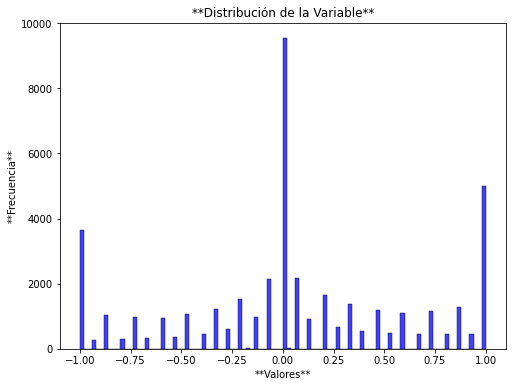

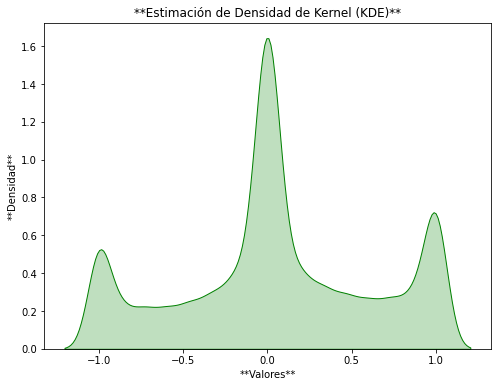

In [21]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df[df["DrawFrequency"] == 1]["utility_agent1"], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df[df["DrawFrequency"] == 1]["utility_agent1"], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

In [ ]:
from tqdm import tqdm

def find_special_binary_features(df, groupcolumn):
    binary_features = [col for col in df.columns if df[col].nunique() == 2]
    special_features = []

    for feature in tqdm(binary_features):
        unique_values = df[feature].unique()
        
        for value in unique_values:
            groups_with_value = df.groupby(groupcolumn).apply(lambda grp: (grp[feature] == value).all())
            if sum(groups_with_value) == 1:
                specific_group = groups_with_value[groups_with_value].index[0]
                if df[df[groupcolumn] != specific_group][feature].nunique() == 1 and \
                   df[df[groupcolumn] != specific_group][feature].unique() != [value]:
                    special_features.append(feature)
                    break

    return special_features

binary_features = find_special_binary_features(df, "GameRulesetName")
print(f"Special Binary Features: {binary_features}")

100%|██████████| 382/382 [10:16<00:00,  1.61s/it] 

Special Binary Features: ['Cooperation', 'Team', 'SpiralShape', 'StarShape', 'SpiralTiling', 'MancalaSixRows', 'AlquerqueBoardWithEightTriangles', 'StarBoard', 'PachisiBoard', 'AutoMove', 'RotationDecision', 'RotationDecisionFrequency', 'SetRotationFrequency', 'PathExtent', 'RightwardsDirection', 'LeftwardsDirection', 'LineDraw', 'GroupLoss', 'GroupDraw', 'LoopLoss', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'ReachLossFrequency', 'ScoringDraw', 'JanggiStyle']


In [ ]:
corr = df.corr()

<ipython-input-93-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
corr.shape

(593, 593)

In [ ]:
corr_matrix = corr.abs()

upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))

# Find columns with correlation equal to 1 (perfect correlation)
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] == 1)]

print(to_drop)
print(len(to_drop))

['AsymmetricForces', 'AsymmetricPiecesType', 'Team', 'CircleTiling', 'SpiralTiling', 'NumPerimeterSites', 'PieceDirection', 'SwapOption', 'NumStartComponentsBoardPerPlayer', 'NumStartComponentsHandPerPlayer', 'NumStartComponentsPerPlayer', 'ShootDecisionFrequency', 'Roll', 'Sow', 'SowOriginFirst', 'SetRotation', 'SetRotationFrequency', 'PathExtent', 'LeftwardDirection', 'LeftwardsDirection', 'ForwardRightDirection', 'BackwardRightDirection', 'LoopEnd', 'LoopWinFrequency', 'LoopLoss', 'PatternWin', 'PatternWinFrequency', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'TerritoryEnd', 'TerritoryWin', 'TerritoryWinFrequency', 'NoProgressDrawFrequency', 'MancalaStyle', 'ShibumiStyle', 'StackState']
37


<ipython-input-100-eab8fd782645>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))
<ipython-input-100-eab8fd782645>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(pd.np.bool))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 1
highly_correlated_features = []

for col in corr.columns:
    for index, value in corr[col].iteritems():
        if abs(value) >= threshold and col != index:
            highly_correlated_features.append((col, index, value))

print("\nHighly Correlated Feature Pairs:")
for item in highly_correlated_features:
    print(f"Feature Pair: {item[0]}, {item[1]} with Correlation: {item[2]}")

print(len(highly_correlated_features))



Highly Correlated Feature Pairs:
Feature Pair: Asymmetric, AsymmetricForces with Correlation: 1.0
Feature Pair: Asymmetric, AsymmetricPiecesType with Correlation: 1.0
Feature Pair: AsymmetricForces, Asymmetric with Correlation: 1.0
Feature Pair: AsymmetricForces, AsymmetricPiecesType with Correlation: 1.0
Feature Pair: AsymmetricPiecesType, Asymmetric with Correlation: 1.0
Feature Pair: AsymmetricPiecesType, AsymmetricForces with Correlation: 1.0
Feature Pair: PlayersWithDirections, PieceDirection with Correlation: 1.0
Feature Pair: Cooperation, Team with Correlation: 1.0
Feature Pair: Team, Cooperation with Correlation: 1.0
Feature Pair: SpiralShape, SpiralTiling with Correlation: 1.0
Feature Pair: CircleShape, CircleTiling with Correlation: 1.0
Feature Pair: SquarePyramidalShape, ShibumiStyle with Correlation: 1.0
Feature Pair: CircleTiling, CircleShape with Correlation: 1.0
Feature Pair: SpiralTiling, SpiralShape with Correlation: 1.0
Feature Pair: MancalaBoard, Sow with Correlatio

<ipython-input-98-8fb938118701>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in corr[col].iteritems():


In [ ]:
import numpy as np

tmp = corr.abs().mask(np.eye(len(corr), dtype=bool))
tmp = tmp[tmp > 0.9]
s = tmp.unstack().dropna()

corr_df = pd.DataFrame(s.index.tolist(), columns=['feature1', 'feature2'])

ValueError: Array conditional must be same shape as self

In [ ]:
corr = corr.dropna(axis=1, how='all')

In [ ]:
corr["utility_agent1"].sort_values(ascending=False)

utility_agent1              1.000000
num_wins_agent1             0.887889
AdvantageP1                 0.443145
PiecesPlacedOutsideBoard    0.088630
Phase                       0.077968
                              ...   
SetHiddenRotation                NaN
SetHiddenState                   NaN
SetHiddenValue                   NaN
SetHiddenWhat                    NaN
SetHiddenWho                     NaN
Name: utility_agent1, Length: 809, dtype: float64

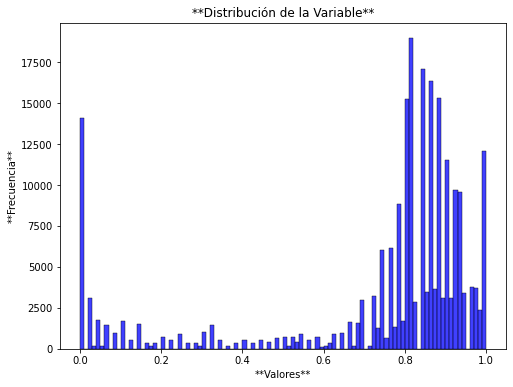

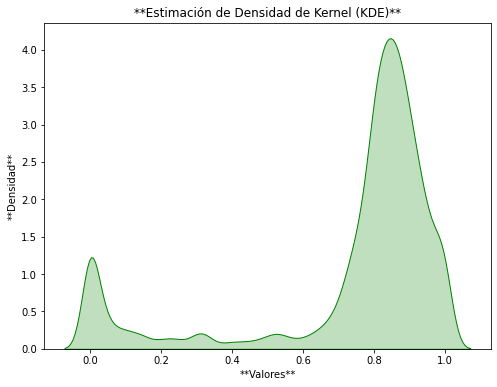

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Balance'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['Balance'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

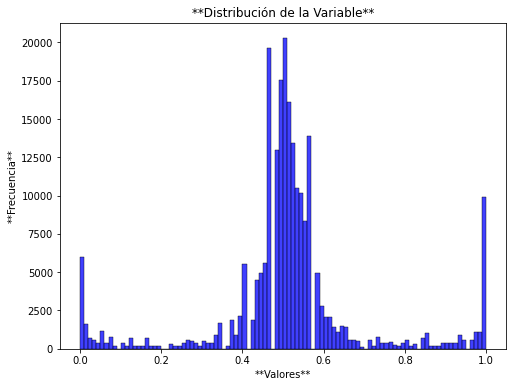

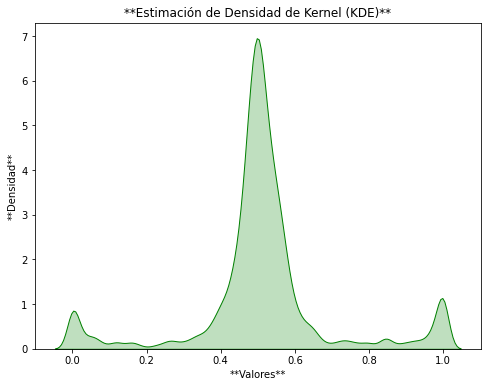

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['AdvantageP1'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['AdvantageP1'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

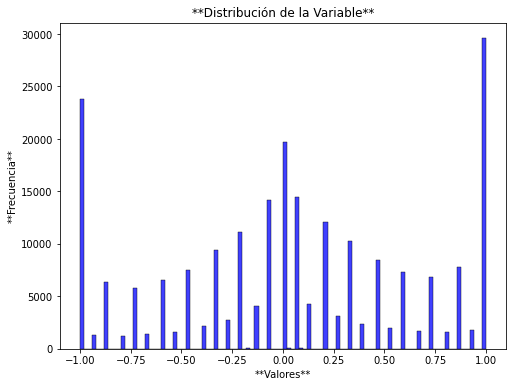

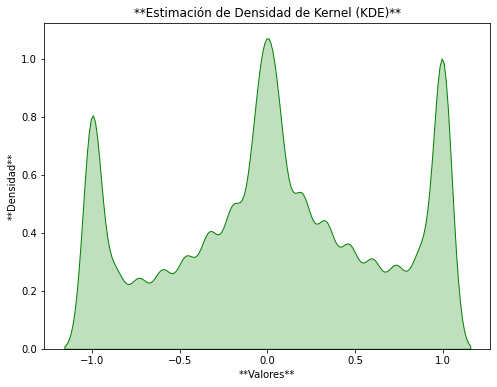

In [ ]:
# Chat GPT generated (I don't know why in Spanish)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['utility_agent1'], kde=False, bins=100, color='blue')
plt.title('**Distribución de la Variable**')
plt.xlabel('**Valores**')
plt.ylabel('**Frecuencia**')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['utility_agent1'], shade=True, color='green')
plt.title('**Estimación de Densidad de Kernel (KDE)**')
plt.xlabel('**Valores**')
plt.ylabel('**Densidad**')
plt.show()

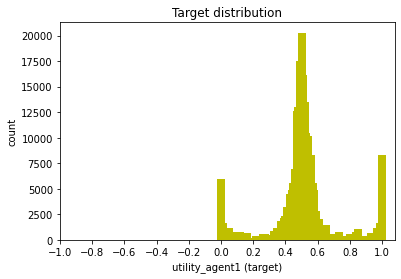

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(*np.unique(df['AdvantageP1'].to_numpy(), return_counts=True), width=0.05, color='y')
plt.xlabel('utility_agent1 (target)')
plt.ylabel('count')
plt.xticks(np.linspace(-1, 1, 11))
plt.title('Target distribution')
plt.show()

In [ ]:
df = df[df["LudRules"].apply(lambda x: "start" in x)]

In [ ]:
df["LudRules"].tolist()[10]

'(game "1D Chess" (players 2) (equipment { (board (rectangle 1 8)) (piece "Rook" Each (move Slide Orthogonal (to if:(is Enemy (who at:(to))) (apply (remove (to)))) ) ) (piece "King" Each (move Step (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) (piece "Knight" Each (move Leap { { F F } } (to if:(not (is Friend (who at:(to)))) (apply (if (is Enemy (who at:(to))) (remove (to)))) ) ) ) } ) (rules (start { (place "Rook1" coord:"C1") (place "Knight1" coord:"B1") (place "King1" coord:"A1") (place "Rook2" coord:"F1") (place "Knight2" coord:"G1") (place "King2" coord:"H1") } ) (play (do (forEach Piece) ifAfterwards:(not (is Threatened (id "King" Mover))) ) ) (end { (if (and (is Threatened (id "King" Next)) (not (can Move (do (forEach Piece Next) ifAfterwards:(not (is Threatened (id "King" Next)) ) ) ) ) ) (result Mover Win) ) (if (or (no Moves Mover) (= (counter) 100)) (result Mover Draw) ) } ) ) )'

In [ ]:
df.value_counts()

Series([], dtype: int64)

In [ ]:
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance_src.csv')

In [ ]:
f.head(50)

,Unnamed: 0,feature,importance
0,597,src_AdvantageP1,15.530264
1,424,Balance,4.956622
2,591,src_p2_selection,4.010179
3,596,src_p2_agent,2.901193
4,593,src_p2_playout,2.842518
5,417,DurationTurnsNotTimeouts,2.223013
6,605,src_selection_exploration,2.194143
7,419,GameTreeComplexity,2.135121
8,585,PlayoutsPerSecond,2.056824
9,428,OutcomeUniformity,1.743090


In [ ]:
len(f[f["importance"] < 0.001]["feature"].tolist())

82

In [1]:
import pandas as pd
f = pd.read_csv('/home/toefl/K/MCTS/dataset/feature_importance_openfe.csv')

In [10]:
[c for c in f["feature"] if "Id" == c]

[]

In [9]:
print([c for c in f["feature"].tolist() if "autoFE" in c][:50])

['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']


In [25]:
len(['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214'])

50

In [1]:
valid_columns = ['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']

In [3]:
valid_features = [int(f.split('_')[-1]) for f in valid_columns]

In [5]:
print(valid_features)

[112, 468, 386, 6, 333, 357, 353, 194, 59, 174, 191, 182, 436, 261, 328, 189, 8, 275, 279, 223, 154, 319, 221, 218, 380, 402, 276, 1, 253, 362, 294, 108, 484, 11, 200, 356, 491, 2, 248, 176, 449, 335, 310, 479, 322, 446, 198, 116, 206, 214]


In [ ]:
# # Area features.

#         area_features = [
#             "NumPlayableSitesOnBoard",
#             "NumColumns",
#             "NumRows",
#             "NumCorners",
#             "NumDirections",
#             "NumOrthogonalDirections",
#             "NumDiagonalDirections",
#             "NumAdjacentDirections",
#             "NumOffDiagonalDirections",
#             "NumOuterSites",
#             "NumInnerSites",
#             "NumLayers",
#             "NumEdges",
#             "NumCells",
#             "NumVertices",
#             "NumPerimeterSites",
#             "NumTopSites",
#             "NumBottomSites",
#             "NumRightSites",
#             "NumLeftSites",
#             "NumCentreSites",
#             "NumConvexCorners",
#             "NumConcaveCorners",
#             "NumPhasesBoard",
#             "Hand",
#             "NumContainers",
#             "NumPlayableSites"
#         ]

#         for feature in area_features:
#             df[f"q_{feature}"] = df[feature] % 2

In [ ]:
print([column for column in f.feature.tolist() if 'src' in column])

['src_AdvantageP1', 'src_p2_selection', 'src_AdvantageBalanceRatio', 'src_p2_playout', 'src_p2_agent', 'src_selection_exploration', 'src_p2_exploration', 'src_AdvantageTimeImpact', 'src_exploration_selection', 'src_OutcomeUniformityAdvantageP1', 'src_p1_playout', 'src_p1_selection', 'src_selection_playout', 'src_playout_playout', 'src_exploration_playout', 'src_selection_selection', 'src_selection_bounds', 'src_playout_bounds', 'src_p1_exploration', 'src_playout_selection', 'src_exploration_bounds', 'src_playout_exploration', 'src_bounds_selection', 'src_p1_agent', 'src_exploration_exploration', 'src_p2_bounds', 'src_bounds_playout', 'src_bounds_exploration', 'src_agent_agent', 'src_playout_agent', 'src_agent_playout', 'src_exploration_agent', 'src_bounds_agent', 'src_agent_exploration', 'src_agent_selection', 'src_agent_bounds', 'src_p1_bounds', 'src_selection_agent', 'src_bounds_bounds']


In [ ]:
f[f["feature"] == "src_AdvantageP1"]

,Unnamed: 0,feature,importance
457,587,src_AdvantageP1,0.019873


In [ ]:
f

NameError: name 'f' is not defined

In [1]:
import pickle
with open('catcols.pickle', 'rb') as file:
    catcols = pickle.load(file)

In [2]:
print(catcols)

['src_p1_selection', 'src_p1_exploration', 'src_p1_playout', 'src_p1_bounds', 'src_p2_selection', 'src_p2_exploration', 'src_p2_playout', 'src_p2_bounds', 'src_agent1', 'src_agent2']


In [ ]:
            # X_train = X_train.rename(columns={"src_Balance": "Balance"})
            # X_valid_src = X_valid_src.rename(columns={"src_Balance": "Balance"})
            # X_valid_tta = X_valid_tta.rename(columns={"src_Balance": "Balance"})

In [ ]:
f.shape

(598, 2)

In [ ]:
len(f[f["importance"] < 0.01])

424

In [ ]:
f[f["importance"] < 0.01]["feature"].tolist()

['Drawishness',
 'NoMovesEndFrequency',
 'MoveDistanceChangeSign',
 'ScoreDifferenceChangeSign',
 'Comparison',
 'SwapPlayersDecisionFrequency',
 'ForEachPiece',
 'NumPhasesBoard',
 'PieceNumberMaxIncrease',
 'SowCW',
 'StepDecisionToFriendFrequency',
 'ConnectionEndFrequency',
 'Cell',
 'SetNextPlayer',
 'Equal',
 'NumConcaveCorners',
 'HopDecisionFrequency',
 'SowSkip',
 'ReplacementCaptureFrequency',
 'Negation',
 'NoMovesDraw',
 'ScoreDifferenceVariance',
 'SlideDecisionFrequency',
 'SlideDecisionToEnemyFrequency',
 'NoMovesNext',
 'LesserThanOrEqual',
 'SlideDecisionToFriendFrequency',
 'Complement',
 'Arithmetic',
 'NoMovesLossFrequency',
 'NoTargetPieceEndFrequency',
 'MoveDistanceChangeLineBestFit',
 'PromotionEffectFrequency',
 'Algorithmics',
 'GoStyle',
 'Capture',
 'ScoreDifferenceAverage',
 'AddEffectFrequency',
 'Then',
 'LeapDecisionFrequency',
 'ScoreDifferenceMaxDecrease',
 'SpaceEnd',
 'DiscComponent',
 'ScoreDifferenceChangeLineBestFit',
 'PieceCount',
 'ScoringWinFr

In [ ]:
f.head(50)

,Unnamed: 0,feature,importance
0,597,src_AdvantageP1,9.871521
1,424,Balance,4.842335
2,591,src_p2_selection,4.008353
3,612,src_AdvantageBalanceRatio,3.788492
4,593,src_p2_playout,3.188467
5,596,src_p2_agent,3.068649
6,622,src_selection_exploration,2.258221
7,592,src_p2_exploration,1.821703
8,613,src_AdvantageTimeImpact,1.776630
9,417,DurationTurnsNotTimeouts,1.675810


In [ ]:
df.shape

(233234, 814)

In [ ]:
dfs = df.copy()

In [ ]:
dft = dfs[(dfs["GameRulesetName"] == df["GameRulesetName"]) & (dfs["agent1"] == df["agent2"]) & (dfs["agent2"] == df["agent1"])]

In [ ]:
dft.shape

(0, 814)

In [ ]:

d1 = df["AdvantageP1"]
d2 = df["MoveDistanceMaxDecrease"]
d1.groupby(d2).rank(ascending=True, pct=True).nunique()

390

In [ ]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [ ]:
feature[0].name

'GroupByThenRank'

In [ ]:
import polars as pl

sub = pl.read_parquet('/home/toefl/K/MCTS/submission.parquet')

In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.179138
233236,0.030618
233235,-0.188421


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.185311
233236,0.014517
233235,-0.185311


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.023419
233235,-0.028186
233236,0.00731


In [ ]:
sub

Id,utility_agent1
i64,f64
233234,0.191369
233236,0.023886
233235,-0.191369


In [ ]:
df["agent1"].nunique()

72

In [ ]:
df["agent"] = df["agent1"] + "_" + df["agent2"] 

In [ ]:
df[["agent", "utility_agent1"]].groupby("agent").mean().sort_values(by="utility_agent1").to_csv('dataset/avg.csv')

In [ ]:
df[["GameRulesetName", "utility_agent1"]].groupby("GameRulesetName").mean().sort_values(by="utility_agent1").to_csv('dataset/avg_game.csv')

In [ ]:
oof_labels = artifacts["catboost"]["oof_labels"]
oof_preds = artifacts["catboost"]["oof_preds"]

oof_preds_fixed = oof_preds.copy()
oof_preds_fixed[df["GameTreeComplexity"] == 0] = 2 * df[df["GameTreeComplexity"] == 0]["src_AdvantageP1"] - 1

In [ ]:
oof_labels[:5]

array([-0.46666667, -0.33333333, -0.06666667, -0.33333333, -0.33333333])

In [ ]:
mean_squared_error(oof_labels, oof_preds_fixed, squared=False)

0.40186378136362766

In [ ]:
import pickle
with open('solver_checkpoint.pickle', 'rb') as file:
    data = pickle.load(file)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Generar predicciones y etiquetas aleatorias
np.random.seed(42)  # para resultados reproducibles
predicciones = np.random.rand(1000) / 2 + 1  # 10 predicciones aleatorias
etiquetas = np.random.rand(1000) / 2 + 1    # 10 etiquetas aleatorias

# Calcular el RMSE
mse = mean_squared_error(etiquetas, predicciones)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

mse = mean_squared_error(etiquetas * 2 - 1, predicciones* 2 - 1)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 0.20361155521938443
RMSE: 0.40722311043876885


In [ ]:
data["catboost"].keys()

dict_keys(['features', 'oof_score', 'models'])

In [ ]:
oof_labels = data["catboost"]["oof_labels"]
oof_preds = data["catboost"]["oof_preds"]

KeyError: 'oof_label'

In [ ]:
slc = df[df["GameTreeComplexity"] == 0][["AdvantageP1", "utility_agent1"]]
mse = abs(slc["AdvantageP1"] - (slc["utility_agent1"] + 1) / 2)

In [ ]:
mse.mean()

0.0384825327510917

In [ ]:
for f in df.columns.tolist():
    if 'src' in f:
        print(f)

In [ ]:
df["utility_agent1"].nunique()

NameError: name 'df' is not defined

In [ ]:
import pickle

with open('feature.pickle', 'rb') as file:
    feature = pickle.load(file)

In [ ]:
print(len(feature))

15924


In [ ]:
import sys
sys.path.append('/home/toefl/K/MCTS/dataset/')
import kaggle_evaluation.mcts_inference_server

In [ ]:
    # self.model_paths=[]
    # self.tfidf_paths=[]

    # def train_model(self,):

    #     X_train=self.CV_feats(X_train,mode='train',model_name=model_name,fold=fold)
    #     X_valid=self.CV_feats(X_valid,mode='test',model_name=model_name,fold=fold)


    # def infer_model(self,test):
    #     test=self.FE(test,mode='test')
    #     test.drop(['GameRulesetName'],axis=1,inplace=True)
    #     test_copy=self.CV_feats(test.copy(),mode='test',model_name=model_name,fold=fold)

In [ ]:
        # m = {}
        # for i, u in enumerate(Y.unique()):
        #     m[u] = i
        # Y = Y.map(m)

In [ ]:
        # # Custom features.

        # df = df.with_columns([
        #     (pl.col('PlayoutsPerSecond') / (pl.col('MovesPerSecond') + 1e-15)).alias('Playouts/Moves'),
        #     (pl.col('MovesPerSecond') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('EfficiencyPerPlayout'),
        #     (pl.col('DurationActions') / (pl.col('DurationTurnsStdDev') + 1e-15)).alias('TurnsDurationEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('MovesPerSecond') + 1e-15)).alias('ActionTimeEfficiency'),
        #     (pl.col('DurationTurnsStdDev') / (pl.col('DurationActions') + 1e-15)).alias('StandardizedTurnsEfficiency'),
        #     (pl.col('DurationActions') / (pl.col('StateTreeComplexity') + 1e-15)).alias('DurationToComplexityRatio'),
        #     (pl.col('GameTreeComplexity') / (pl.col('StateTreeComplexity') + 1e-15)).alias('NormalizedGameTreeComplexity'),
        #     (pl.col('Balance') * pl.col('GameTreeComplexity')).alias('ComplexityBalanceInteraction'),
        #     (pl.col('StateTreeComplexity') + pl.col('GameTreeComplexity')).alias('OverallComplexity'),
        #     (pl.col('GameTreeComplexity') / (pl.col('PlayoutsPerSecond') + 1e-15)).alias('ComplexityPerPlayout'),
        #     (pl.col('DurationTurnsNotTimeouts') / (pl.col('MovesPerSecond') + 1e-15)).alias('TurnsNotTimeouts/Moves'),
        #     (pl.col('Timeouts') / (pl.col('DurationActions') + 1e-15)).alias('Timeouts/DurationActions'),
        #     (pl.col('StepDecisionToEnemy') + pl.col('SlideDecisionToEnemy') + pl.col('HopDecisionMoreThanOne')).alias('ComplexDecisionRatio'),
        #     (pl.col('StepDecisionToEnemy') + 
        #      pl.col('HopDecisionEnemyToEnemy') + 
        #      pl.col('HopDecisionFriendToEnemy') + 
        #      pl.col('SlideDecisionToEnemy')).alias('AggressiveActionsRatio'),

        #     (pl.col('src_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('src_AdvantageBalanceRatio'),
        #     (pl.col('src_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('src_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('src_AdvantageP1') + 1e-15)).alias('src_OutcomeUniformity/AdvantageP1'),

        #     (pl.col('tta_AdvantageP1') / (pl.col('Balance') + 1e-15)).alias('tta_AdvantageBalanceRatio'),
        #     (pl.col('tta_AdvantageP1') / (pl.col('DurationActions') + 1e-15)).alias('tta_AdvantageTimeImpact'),
        #     (pl.col('OutcomeUniformity') / (pl.col('tta_AdvantageP1') + 1e-15)).alias('tta_OutcomeUniformity/AdvantageP1'),
        # ])

In [ ]:
# Y_train = Y_train.astype(np.float64)
#             X[src_columns].to_csv('Xtrain.csv')
#             Y.to_csv('Ytrain.csv')

#             print('here')

#             ofe = OpenFE()
#             features = ofe.fit(data=X_train, label=Y_train.astype(np.float64))
#             print(features)
#             train_x, _ = transform(X_train, X_valid, features)
#             train_x.to_csv('features.csv')

In [ ]:
    #   def ARI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         ari_score = 4.71*(characters/words)+0.5*(words/sentence)-21.43
    #         return ari_score

    #     def McAlpine_EFLAW(txt):
    #         W = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         S = len(re.split('\\.|\\?|\\!', txt))
    #         mcalpine_eflaw_score = (W+S*W)/S
    #         return mcalpine_eflaw_score
        
    #     def CLRI(txt):
    #         characters = len(txt)
    #         words = len(re.split(' |\\n|\\.|\\?|\\!|\,', txt))
    #         sentence = len(re.split('\\.|\\?|\\!', txt))
    #         L = 100*characters/words
    #         S = 100*sentence/words
    #         clri_score = 0.0588*L-0.296*S-15.8
    #         return clri_score
        
    #     def drop_gamename(rule):
    #         rule = rule[len('(game "'):]
    #         for i in range(len(rule)):
    #             if rule[i] == '"':
    #                 return rule[i+1:]
                
    #     def get_player(rule):
    #         player = ''
    #         stack = []
    #         for i in range(len(rule)):
    #             player += rule[i]
    #             if rule[i] in ['(', '{']:
    #                 stack.append(rule[i])
    #             elif rule[i] in [')', '}']:
    #                 stack = stack[:-1]
    #                 if len(stack) == 0:
    #                     return player

In [ ]:
# Player position (positive / negative).

        # total_agent = ['MCTS-ProgressiveHistory-0.1-MAST-false', 'MCTS-ProgressiveHistory-0.1-MAST-true', 'MCTS-ProgressiveHistory-0.1-NST-false', 'MCTS-ProgressiveHistory-0.1-NST-true', 'MCTS-ProgressiveHistory-0.1-Random200-false', 'MCTS-ProgressiveHistory-0.1-Random200-true', 'MCTS-ProgressiveHistory-0.6-MAST-false', 'MCTS-ProgressiveHistory-0.6-MAST-true', 'MCTS-ProgressiveHistory-0.6-NST-false', 'MCTS-ProgressiveHistory-0.6-NST-true', 'MCTS-ProgressiveHistory-0.6-Random200-false', 'MCTS-ProgressiveHistory-0.6-Random200-true', 'MCTS-ProgressiveHistory-1.41421356237-MAST-false', 'MCTS-ProgressiveHistory-1.41421356237-MAST-true', 'MCTS-ProgressiveHistory-1.41421356237-NST-false', 'MCTS-ProgressiveHistory-1.41421356237-NST-true', 'MCTS-ProgressiveHistory-1.41421356237-Random200-false', 'MCTS-ProgressiveHistory-1.41421356237-Random200-true', 'MCTS-UCB1-0.1-MAST-false', 'MCTS-UCB1-0.1-MAST-true', 'MCTS-UCB1-0.1-NST-false', 'MCTS-UCB1-0.1-NST-true', 'MCTS-UCB1-0.1-Random200-false', 'MCTS-UCB1-0.1-Random200-true', 'MCTS-UCB1-0.6-MAST-false', 'MCTS-UCB1-0.6-MAST-true', 'MCTS-UCB1-0.6-NST-false', 'MCTS-UCB1-0.6-NST-true', 'MCTS-UCB1-0.6-Random200-false', 'MCTS-UCB1-0.6-Random200-true', 'MCTS-UCB1-1.41421356237-MAST-false', 'MCTS-UCB1-1.41421356237-MAST-true', 'MCTS-UCB1-1.41421356237-NST-false', 'MCTS-UCB1-1.41421356237-NST-true', 'MCTS-UCB1-1.41421356237-Random200-false', 'MCTS-UCB1-1.41421356237-Random200-true', 'MCTS-UCB1GRAVE-0.1-MAST-false', 'MCTS-UCB1GRAVE-0.1-MAST-true', 'MCTS-UCB1GRAVE-0.1-NST-false', 'MCTS-UCB1GRAVE-0.1-NST-true', 'MCTS-UCB1GRAVE-0.1-Random200-false', 'MCTS-UCB1GRAVE-0.1-Random200-true', 'MCTS-UCB1GRAVE-0.6-MAST-false', 'MCTS-UCB1GRAVE-0.6-MAST-true', 'MCTS-UCB1GRAVE-0.6-NST-false', 'MCTS-UCB1GRAVE-0.6-NST-true', 'MCTS-UCB1GRAVE-0.6-Random200-false', 'MCTS-UCB1GRAVE-0.6-Random200-true', 'MCTS-UCB1GRAVE-1.41421356237-MAST-false', 'MCTS-UCB1GRAVE-1.41421356237-MAST-true', 'MCTS-UCB1GRAVE-1.41421356237-NST-false', 'MCTS-UCB1GRAVE-1.41421356237-NST-true', 'MCTS-UCB1GRAVE-1.41421356237-Random200-false', 'MCTS-UCB1GRAVE-1.41421356237-Random200-true', 'MCTS-UCB1Tuned-0.1-MAST-false', 'MCTS-UCB1Tuned-0.1-MAST-true', 'MCTS-UCB1Tuned-0.1-NST-false', 'MCTS-UCB1Tuned-0.1-NST-true', 'MCTS-UCB1Tuned-0.1-Random200-false', 'MCTS-UCB1Tuned-0.1-Random200-true', 'MCTS-UCB1Tuned-0.6-MAST-false', 'MCTS-UCB1Tuned-0.6-MAST-true', 'MCTS-UCB1Tuned-0.6-NST-false', 'MCTS-UCB1Tuned-0.6-NST-true', 'MCTS-UCB1Tuned-0.6-Random200-false', 'MCTS-UCB1Tuned-0.6-Random200-true', 'MCTS-UCB1Tuned-1.41421356237-MAST-false', 'MCTS-UCB1Tuned-1.41421356237-MAST-true', 'MCTS-UCB1Tuned-1.41421356237-NST-false', 'MCTS-UCB1Tuned-1.41421356237-NST-true', 'MCTS-UCB1Tuned-1.41421356237-Random200-false', 'MCTS-UCB1Tuned-1.41421356237-Random200-true']
        
        # agent1, agent2 = df['src_p1_agent'].values, df['src_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'src_agent_{total_agent[i]}'] = value
        
        # agent1, agent2 = df['tta_p1_agent'].values, df['tta_p2_agent'].values
        # for i in range(len(total_agent)):
        #     value = np.zeros(len(df))
        #     for j in range(len(df)):
        #         if agent1[j] == total_agent[i]:
        #             value[j] += 1
        #         elif agent2[j] == total_agent[i]:
        #             value[j] -= 1
        #     df[f'tta_agent_{total_agent[i]}'] = value

        # # One-hot encoding.

        # onehot_cols = [['NumOffDiagonalDirections', [0.0, 4.82, 2.0, 5.18, 3.08, 0.06]], ['NumLayers', [1, 0, 4, 5]], ['NumPhasesBoard', [3, 2, 1, 5, 4]], ['NumContainers', [1, 4, 3, 2]], ['NumDice', [0, 2, 1, 4, 6, 3, 5, 7]], ['ProposeDecisionFrequency', [0.0, 0.05, 0.01]], ['PromotionDecisionFrequency', [0.0, 0.01, 0.03, 0.02, 0.11, 0.05, 0.04]], ['SlideDecisionToFriendFrequency', [0.0, 0.19, 0.06]], ['LeapDecisionToEnemyFrequency', [0.0, 0.04, 0.01, 0.02, 0.07, 0.03, 0.14, 0.08]], ['HopDecisionFriendToFriendFrequency', [0.0, 0.13, 0.09]], ['HopDecisionEnemyToEnemyFrequency', [0.0, 0.01, 0.2, 0.03]], ['HopDecisionFriendToEnemyFrequency', [0.0, 0.01, 0.09, 0.25, 0.02]], ['FromToDecisionFrequency', [0.0, 0.38, 1.0, 0.31, 0.94, 0.67]], ['ProposeEffectFrequency', [0.0, 0.01, 0.03]], ['PushEffectFrequency', [0.0, 0.5, 0.96, 0.25]], ['FlipFrequency', [0.0, 0.87, 1.0, 0.96]], ['SetCountFrequency', [0.0, 0.62, 0.54, 0.02]], ['DirectionCaptureFrequency', [0.0, 0.55, 0.54]], ['EncloseCaptureFrequency', [0.0, 0.08, 0.1, 0.07, 0.12, 0.02, 0.09]], ['InterveneCaptureFrequency', [0.0, 0.01, 0.14, 0.04]], ['SurroundCaptureFrequency', [0.0, 0.01, 0.03, 0.02]], ['NumPlayPhase', [1, 2, 3, 4, 5, 6, 7, 8]], ['LineLossFrequency', [0.0, 0.96, 0.87, 0.46, 0.26, 0.88, 0.94]], ['ConnectionEndFrequency', [0.0, 0.19, 1.0, 0.23, 0.94, 0.35, 0.97]], ['ConnectionLossFrequency', [0.0, 0.54, 0.78]], ['GroupEndFrequency', [0.0, 1.0, 0.11, 0.79]], ['GroupWinFrequency', [0.0, 0.11, 1.0]], ['LoopEndFrequency', [0.0, 0.14, 0.66]], ['LoopWinFrequency', [0.0, 0.14, 0.66]], ['PatternEndFrequency', [0.0, 0.63, 0.35]], ['PatternWinFrequency', [0.0, 0.63, 0.35]], ['NoTargetPieceWinFrequency', [0.0, 0.72, 0.77, 0.95, 0.32, 1.0]], ['EliminatePiecesLossFrequency', [0.0, 0.85, 0.96, 0.68]], ['EliminatePiecesDrawFrequency', [0.0, 0.03, 0.91, 1.0, 0.36, 0.86]], ['NoOwnPiecesLossFrequency', [0.0, 1.0, 0.68]], ['FillEndFrequency', [0.0, 1.0, 0.04, 0.01, 0.99, 0.72]], ['FillWinFrequency', [0.0, 1.0, 0.04, 0.01, 0.99]], ['ReachDrawFrequency', [0.0, 0.9, 0.98]], ['ScoringLossFrequency', [0.0, 0.6, 0.62]], ['NoMovesLossFrequency', [0.0, 1.0, 0.13, 0.06]], ['NoMovesDrawFrequency', [0.0, 0.01, 0.04, 0.03, 0.22]], ['BoardSitesOccupiedChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 0.94]], ['BranchingFactorChangeNumTimesn', [0.0, 0.3, 0.02, 0.07, 0.04, 0.13, 0.01, 0.21, 0.03]], ['PieceNumberChangeNumTimes', [0.0, 0.06, 0.42, 0.12, 0.14, 1.0]], ['src_p1_selection', ['ProgressiveHistory', 'UCB1', 'UCB1GRAVE', 'UCB1Tuned']], ['src_p2_selection', ['ProgressiveHistory', 'UCB1GRAVE', 'UCB1', 'UCB1Tuned']], ['src_p1_exploration', ['0.1', '0.6', '1.41421356237']], ['src_p2_exploration', ['0.6', '0.1', '1.41421356237']], ['src_p1_playout', ['MAST', 'NST', 'Random200']], ['src_p2_playout', ['Random200', 'NST', 'MAST']]]
        # for col, unique in onehot_cols:
        #     for u in unique:
        #         df[f'{col}_{u}'] = (df[col] == u).astype(np.int8)
        #         if 'src' in col:
        #             tta_col = col.replace('src', 'tta')
        #             df[f'{tta_col}_{u}'] = (df[col] == u).astype(np.int8)

        # Drop game's name from the rules.

        # df['LudRules'] = df['LudRules'].apply(lambda x: drop_gamename(x))

        # # Get player.

        # df['player'] = df['LudRules'].apply(lambda rule: get_player(rule))
        # df['player_len'] = df['player'].apply(len)
        # df['LudRules'] = [rule[len(player):] for player, rule in zip(
        #     df['player'], df['LudRules'])]
        # df = df.drop(['player'], axis=1)

        # # Rules parcing.

        # for rule in ['EnglishRules', 'LudRules']:
        #     df[rule + "_ARI"] = df[rule].apply(lambda x: ARI(x))
        #     df[rule + "CLRI"] = df[rule].apply(lambda x: CLRI(x))
        #     df[rule + "McAlpine_EFLAW"] = df[rule].apply(lambda x: McAlpine_EFLAW(x))

        # # External features.

        # df['PlayoutsPerSecond/MovesPerSecond'] = df['PlayoutsPerSecond'] / df['MovesPerSecond']

In [ ]:
            # # Feature encoding.
        
            # features_to_encode = [
            #     'src_p2_selection',
            #     'src_p2_playout',
            #     'src_p2_agent',
            #     'src_selection_exploration',
            #     'src_p2_exploration',
            #     'src_exploration_selection',
            #     'src_p1_playout',
            #     'src_p1_selection',
            #     'src_selection_playout',
            #     'src_playout_playout',
            #     'src_exploration_playout',
            #     'src_selection_selection',
            #     'src_selection_bounds',
            #     'src_playout_bounds',
            #     'src_p1_exploration',
            #     'src_playout_selection',
            #     'src_exploration_bounds',
            #     'src_playout_exploration',
            #     'src_bounds_selection',
            #     'src_p1_agent',
            #     'src_exploration_exploration',
            #     'src_p2_bounds',
            #     'src_bounds_playout',
            #     'src_bounds_exploration',
            #     'src_agent_agent',
            #     'src_playout_agent',
            #     'src_agent_playout',
            #     'src_exploration_agent',
            #     'src_bounds_agent',
            #     'src_agent_exploration',
            #     'src_agent_selection',
            #     'src_agent_bounds',
            #     'src_p1_bounds',
            #     'src_selection_agent',
            #     'src_bounds_bounds',
            # ]

            # print("Feature encoding")
            # for feature in tqdm(features_to_encode):

            #     # Original
            #     m = {}
            #     for u in X_train[feature].unique():
            #         m[u] = Y_train[X_train[feature] == u].median()
            #     X_train['encoded' + feature] = X_train[feature].map(m)
            #     X_valid['encoded' + feature] = X_valid[feature].map(m)

            #     # TTA
            #     m = {}
            #     feature = feature.replace('src', 'tta')
            #     for u in X_train[feature].unique():
            #         m[u] = Y_train[X_train[feature] == u].median()
            #     X_valid['encoded' + feature] = X_valid[feature].map(m)

            # print("Shape after feature encoding", X_train.shape)

In [ ]:
# columns_to_drop = ['GameRulesetName','Cooperation', 'Team', 'SpiralShape', 'StarShape', 'SpiralTiling', 'MancalaSixRows', 'AlquerqueBoardWithEightTriangles', 'StarBoard', 'PachisiBoard', 'AutoMove', 'RotationDecision', 'RotationDecisionFrequency', 'SetRotationFrequency', 'PathExtent', 'RightwardsDirection', 'LeftwardsDirection', 'LineDraw', 'GroupLoss', 'GroupDraw', 'LoopLoss', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'ReachLossFrequency', 'ScoringDraw', 'JanggiStyle']

In [ ]:
# 'AsymmetricForces', 'AsymmetricPiecesType', 'Team', 'CircleTiling', 'SpiralTiling', 'NumPerimeterSites', 'PieceDirection', 'SwapOption', 'NumStartComponentsBoardPerPlayer', 'NumStartComponentsHandPerPlayer', 'NumStartComponentsPerPlayer', 'ShootDecisionFrequency', 'Roll', 'Sow', 'SowOriginFirst', 'SetRotation', 'SetRotationFrequency', 'PathExtent', 'LeftwardDirection', 'LeftwardsDirection', 'ForwardRightDirection', 'BackwardRightDirection', 'LoopEnd', 'LoopWinFrequency', 'LoopLoss', 'PatternWin', 'PatternWinFrequency', 'PathExtentEnd', 'PathExtentWin', 'PathExtentLoss', 'TerritoryEnd', 'TerritoryWin', 'TerritoryWinFrequency', 'NoProgressDrawFrequency', 'MancalaStyle', 'ShibumiStyle', 'StackState'

In [ ]:
            # # Magic features.

            # print("Generating magic features.")

            # mappings = {}
            # for feature in tqdm(X_train.columns):
            #     m = {}

            #     for u in X_train[feature].unique():
            #         slc = Y_train[X_train[feature] == u]
            #         if len(slc) < 100: continue

            #         if (Y_train == 1).all():
            #             m[feature] = 3
            #         elif (Y_train == 0).all():
            #             m[feature] = 2
            #         elif (Y_train == -1).all():
            #             m[feature] = 1
            #         else:
            #             m[feature] = 0
                
            #     mappings[feature] = m

            # columns = []
            # for f, m in mappings.items():
            #     X_train[f'{f}_m'] = X_train[f].map(m)
            #     X_valid_src[f'{f}_m'] = X_valid_src[f].map(m)
            #     X_valid_tta[f'{f}_m'] = X_valid_tta[f].map(m)
            #     columns.append(f'{f}_m')

            # X_train["magic"] = X_train[columns].max(axis=1)
            # X_train = X_train.drop(columns, axis=1)
            # X_valid_src["magic"] = X_valid_src[columns].max(axis=1)
            # X_valid_src = X_valid_src.drop(columns, axis=1)
            # X_valid_tta["magic"] = X_valid_tta[columns].max(axis=1)
            # X_valid_tta = X_valid_tta.drop(columns, axis=1)

            # print("Shape with a magic feature.", X_train.shape)

In [ ]:

                # valid_columns = ['autoFE_f_112', 'autoFE_f_468', 'autoFE_f_386', 'autoFE_f_6', 'autoFE_f_333', 'autoFE_f_357', 'autoFE_f_353', 'autoFE_f_194', 'autoFE_f_59', 'autoFE_f_174', 'autoFE_f_191', 'autoFE_f_182', 'autoFE_f_436', 'autoFE_f_261', 'autoFE_f_328', 'autoFE_f_189', 'autoFE_f_8', 'autoFE_f_275', 'autoFE_f_279', 'autoFE_f_223', 'autoFE_f_154', 'autoFE_f_319', 'autoFE_f_221', 'autoFE_f_218', 'autoFE_f_380', 'autoFE_f_402', 'autoFE_f_276', 'autoFE_f_1', 'autoFE_f_253', 'autoFE_f_362', 'autoFE_f_294', 'autoFE_f_108', 'autoFE_f_484', 'autoFE_f_11', 'autoFE_f_200', 'autoFE_f_356', 'autoFE_f_491', 'autoFE_f_2', 'autoFE_f_248', 'autoFE_f_176', 'autoFE_f_449', 'autoFE_f_335', 'autoFE_f_310', 'autoFE_f_479', 'autoFE_f_322', 'autoFE_f_446', 'autoFE_f_198', 'autoFE_f_116', 'autoFE_f_206', 'autoFE_f_214']

                # X_train = X_train.drop([column for column in X_train.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)
                # X_valid_src = X_valid_src.drop([column for column in X_valid_src.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)
                # X_valid_tta = X_valid_tta.drop([column for column in X_valid_tta.columns if ('autoFE' in column) & (column not in valid_columns)], axis=1)